In [1]:
from   datetime import datetime
import sys

import matplotlib.pyplot as plt

sys.path.append('..')
from models.pct_in_optimizer.optimizer import (
    PercentInOptimizer, plot_results)

In [2]:
RECURSION_LIMIT = 100
sys.setrecursionlimit(RECURSION_LIMIT)

In [3]:
FRIDAY = 4
weekday = datetime.now().weekday()
ITERS = 75 if weekday >= FRIDAY else 1
print('ITERS:', ITERS)
OUTPATH = '../data/pct_params'
years_of_data = 10
symbols = ['^W5000', '^IXIC']
tickers = {'^W5000': 'wilshire',
           '^IXIC': 'nasdaq'}
paths = {'^NYA': '../data/nya1965.csv',
         '^IXIC': '../data/nasdaq1965.csv',
         '^W5000': '../data/wilshire1990.csv'}

ITERS: 75





WILSHIRE


--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 2012-01-31
Successfully loaded params from ../data/pct_params/wilshire_10yr_3param.json
{   'params': {   'amounts': [   -0.8212487175714279,
                                 0.9792021142705707,
                                 0.32130689971446014],
                  'qs': [   0.85870183154195,
                            -0.38120935617069596,
                            0.8861152694196518]},
    'sd': 0.04823909086383079,
    'window': 115}
 1: Final value: $49337.41 (window = 115; sd = 0.048)
10: Final value: $49647.93 (window = 102; sd = 0.044)
New best model!
{   'amounts': [-0.7198181796627567, 0.99, 0.6396433483265719],
    'qs': [0.866202120986174, -0.5715501949720163, 0.7250951079763693]}
13: Final value: $50309.25 (window = 106; sd = 0.065)
New best model!
{   'amounts': [-0.9813847986857982, 0.99, 0.31160449180816974]

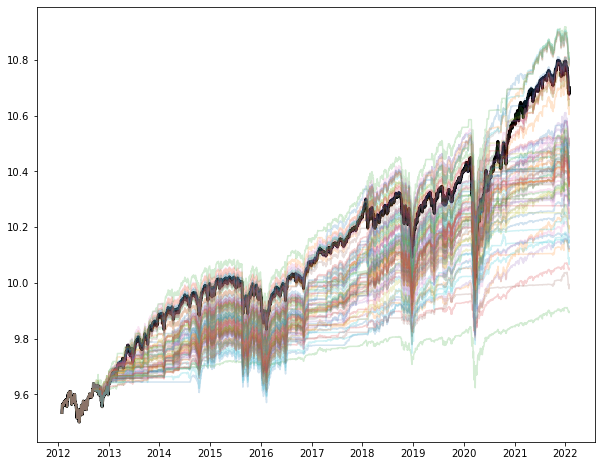

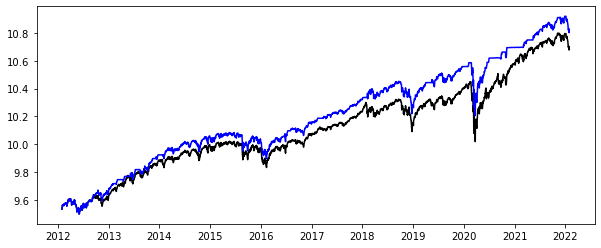

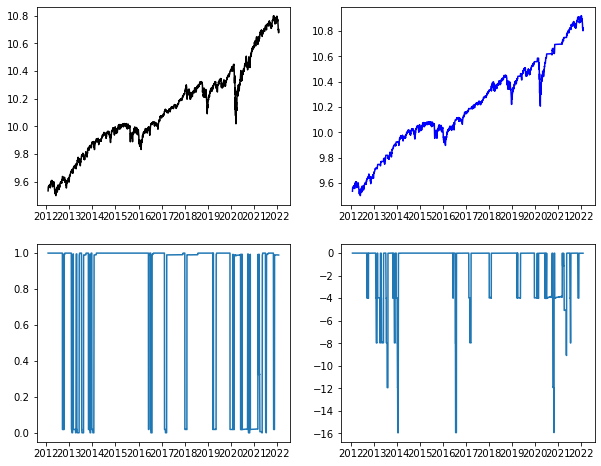



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 2012-01-31
Successfully loaded params from ../data/pct_params/wilshire_10yr_2param.json
{   'params': {   'amounts': [-0.9278350619945178, 0.988769626087045],
                  'qs': [-0.7294969968728876, -0.5770587589367441]},
    'sd': 0.006168832458370794,
    'window': 318}
 1: Final value: $58337.81 (window = 318; sd = 0.006)
16: Final value: $58871.21 (window = 320; sd = 0.005)
New best model!
{   'amounts': [-0.9551740095274909, 0.9799936131535489],
    'qs': [-0.7278160646491707, -0.5510200604402969]}
75: Final value: $48635.75 (window = 349; sd = 0.004)
% in now: 0.9999999966667782
Actions taken: 77
Wrote params to ../data/pct_params/wilshire_10yr_2param.json


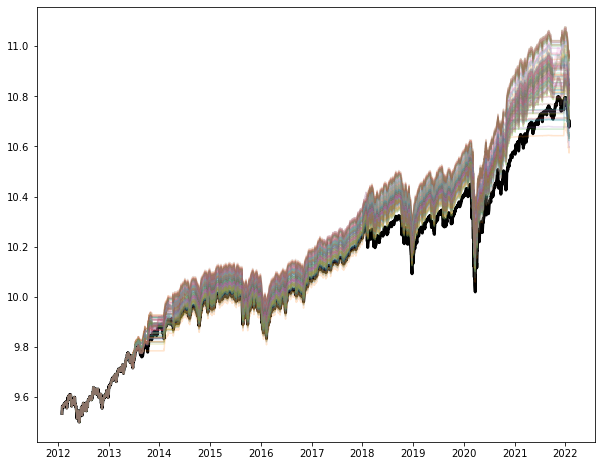

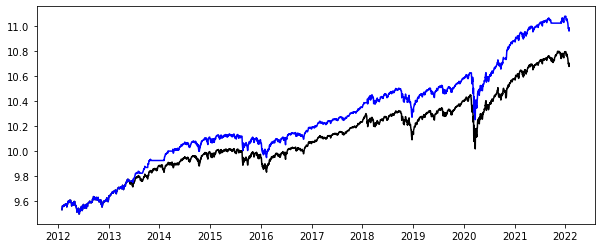

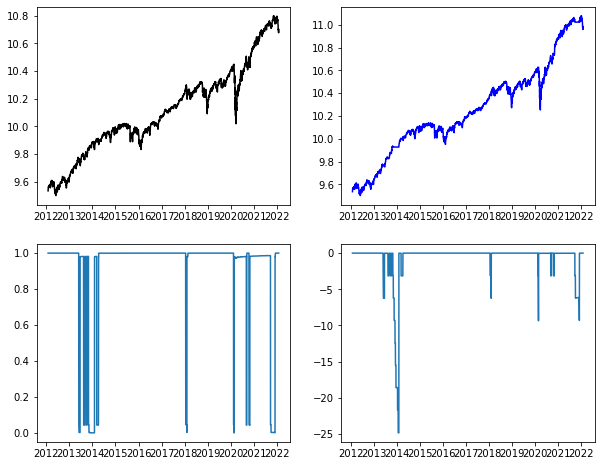



--------------------------------------------------
Beginning 1-param model...
--------------------------------------------------
Using start date: 2012-01-31
Successfully loaded params from ../data/pct_params/wilshire_10yr_1param.json
{   'params': {'amounts': [-0.12839549674254713], 'qs': [-0.7262491762466567]},
    'sd': 0.1553157806723717,
    'window': 687}
 1: Final value: $45250.64 (window = 687; sd = 0.155)
75: Final value: $21654.30 (window = 737; sd = 0.074))
% in now: 0.7454205295383762
Actions taken: 2
Wrote params to ../data/pct_params/wilshire_10yr_1param.json


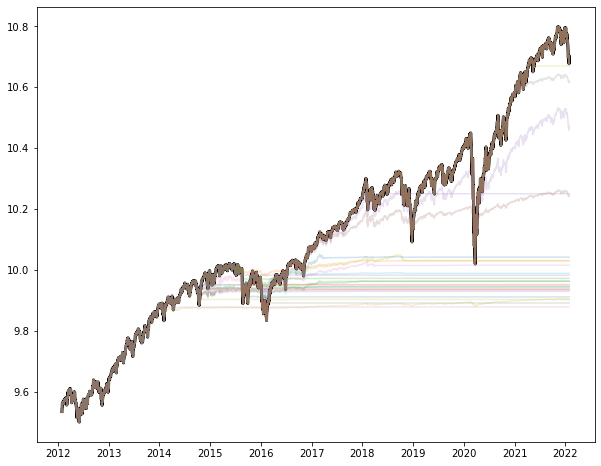

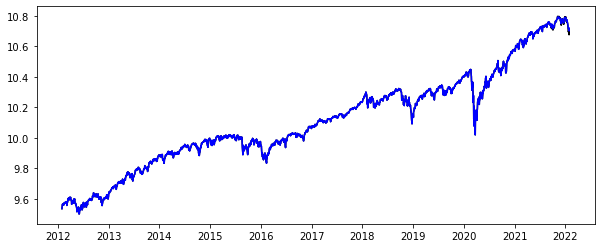

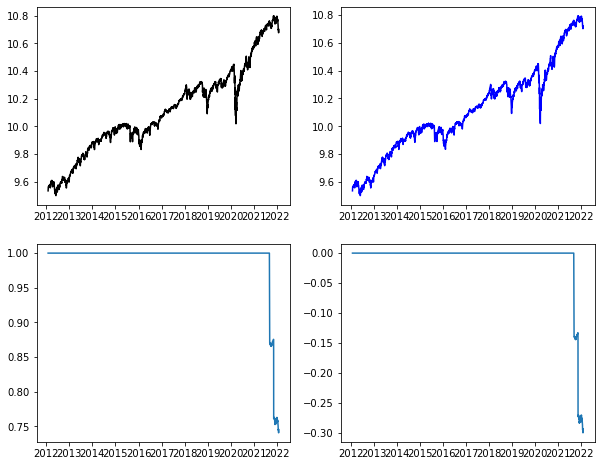




NASDAQ


--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 2012-01-31
Successfully loaded params from ../data/pct_params/nasdaq_10yr_3param.json
{   'params': {   'amounts': [   0.9553723593953259,
                                 -0.9886493950164083,
                                 0.9773420251812474],
                  'qs': [   -0.8061822689534162,
                            0.9074583139984693,
                            -0.41066697588600376]},
    'sd': 0.0024629027262230156,
    'window': 232}
 1: Final value: $16739.61 (window = 232; sd = 0.002)
75: Final value: $13770.57 (window = 242; sd = 0.607)
% in now: 1.0
Actions taken: 90
Wrote params to ../data/pct_params/nasdaq_10yr_3param.json


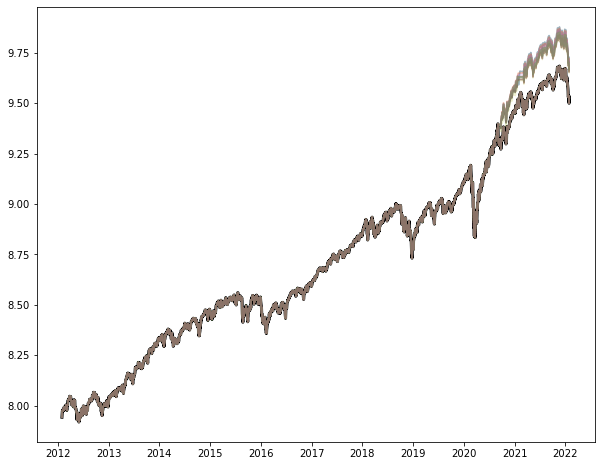

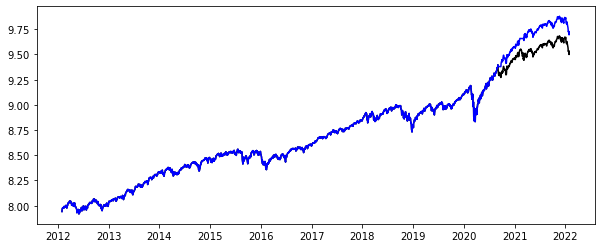

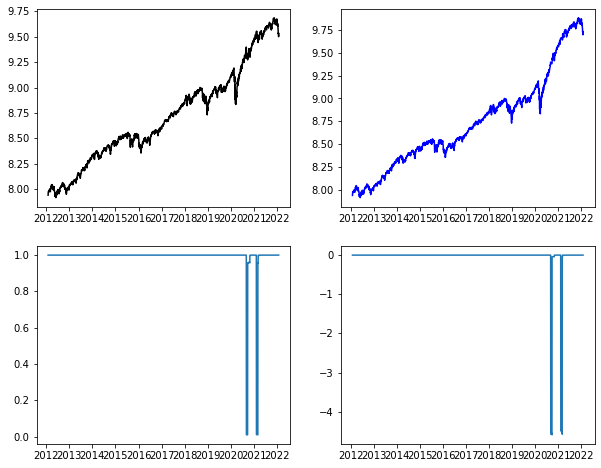



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 2012-01-31
Successfully loaded params from ../data/pct_params/nasdaq_10yr_2param.json
{   'params': {   'amounts': [-0.8950222994713632, 0.9346999079809988],
                  'qs': [-0.38239467153495915, -0.29436675874329055]},
    'sd': 0.002301242717079188,
    'window': 114}
 1: Final value: $16743.30 (window = 114; sd = 0.002)
75: Final value: $13113.91 (window = 112; sd = 0.566)
% in now: 0.9299155908827929
Actions taken: 135
Wrote params to ../data/pct_params/nasdaq_10yr_2param.json


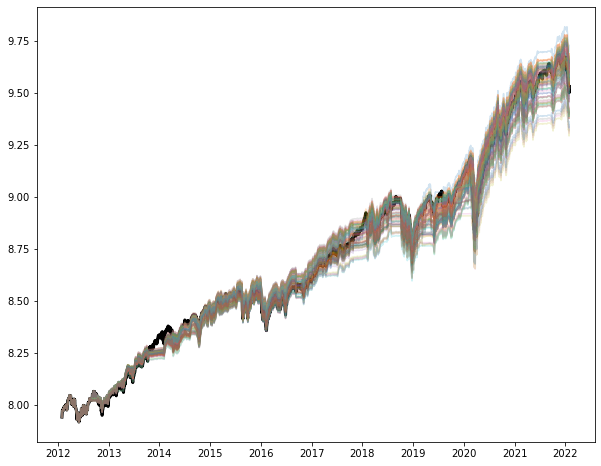

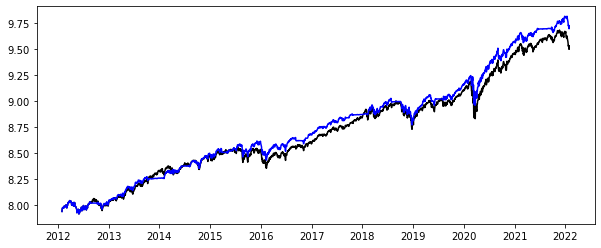

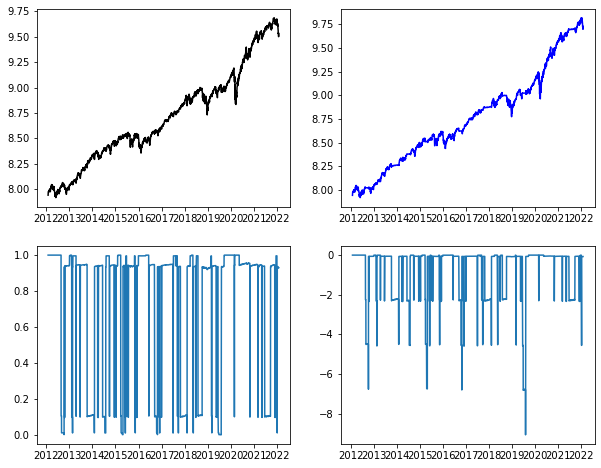



--------------------------------------------------
Beginning 1-param model...
--------------------------------------------------
Using start date: 2012-01-31
Successfully loaded params from ../data/pct_params/nasdaq_10yr_1param.json
{   'params': {'amounts': [-0.9524333719827183], 'qs': [0.7576879638790872]},
    'sd': 0.2353269404126841,
    'window': 608}
 1: Final value: $13974.78 (window = 608; sd = 0.235)
75: Final value: $ 3871.53 (window = 393; sd = 0.112))
% in now: 0.002229522339071394
Actions taken: 2
Wrote params to ../data/pct_params/nasdaq_10yr_1param.json


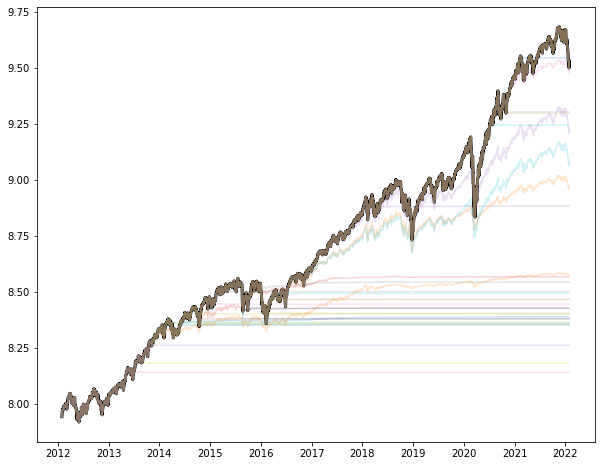

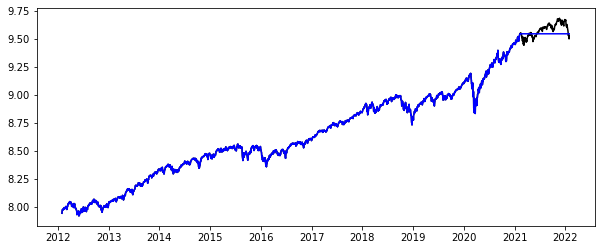

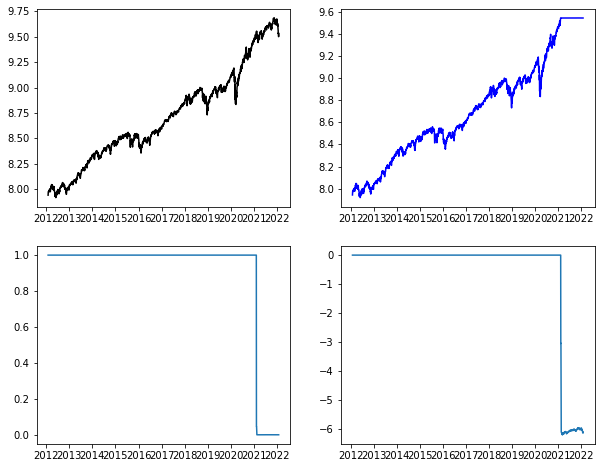

Percents in:
wilshire: [0.9893, 1.0, 0.7454]
nasdaq: [1.0, 0.9299, 0.0022]


In [4]:
percent_in = {}

for symbol in symbols:
    ticker = tickers[symbol]
    path = paths[symbol]
    percent_in[ticker] = []
    print(f'\n\n\n{"=" * 60}')
    print(ticker.upper())
    print('=' * 60)
    for n_params in [3, 2, 1]:
        print(f'\n\n{"-" * 50}')
        print(f'Beginning {n_params}-param model...')
        print('-' * 50)
        filename = f'{ticker}_{years_of_data}yr_{n_params}param.json'
        optim = PercentInOptimizer(n_params, years_of_data, symbol)
        optim.load_params(f'{OUTPATH}/{filename}')
        optim.get_data(df=path)
        specified = None
        best_data = optim.run_sim(ITERS)
        percent_in[ticker].append(plot_results(best_data))
        optim.save_params(f'{OUTPATH}/{filename}')
        plt.show()
print('Percents in:')
for k, v in percent_in.items():
    v = [round(val, 4) for val in v]
    print(f'{k}: {v}')